In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive", timeout_ms=300000)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CodSoft/spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
sms_data = df.where((pd.notnull(df)), '')

In [ ]:
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [ ]:
sms_data.shape

(5572, 5)

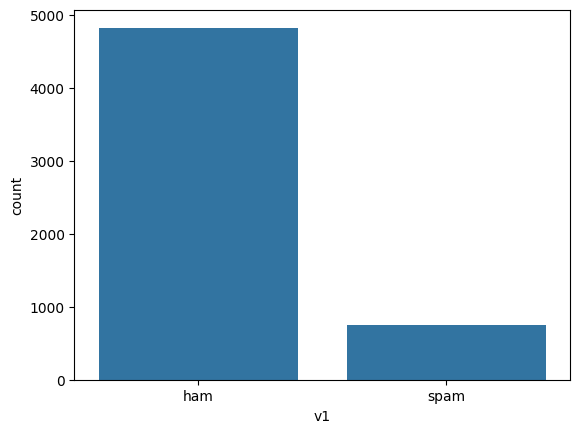

In [ ]:
sns.countplot(x=df['v1'])
plt.show()

In [ ]:
sms_data.loc[:,'v2'] = sms_data.loc[:,'v2'].str.lower()

In [ ]:
sms_data.loc[sms_data['v1'] =='spam', 'label'] = 1
sms_data.loc[sms_data['v1'] =='ham', 'label'] = 0

In [ ]:
x =  sms_data['v2']
y = sms_data['label']

In [ ]:
x

,v2
0,"go until jurong point, crazy.. available only ..."
1,ok lar... joking wif u oni...
2,free entry in 2 a wkly comp to win fa cup fina...
3,u dun say so early hor... u c already then say...
4,"nah i don't think he goes to usf, he lives aro..."
...,...
5567,this is the 2nd time we have tried 2 contact u...
5568,will ì_ b going to esplanade fr home?
5569,"pity, * was in mood for that. so...any other s..."
5570,the guy did some bitching but i acted like i'd...


In [ ]:
y

,label
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
5567,1.0
5568,0.0
5569,0.0
5570,0.0


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [ ]:
x.shape
x_train.shape
x_test.shape

(1115,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train = feature_extraction.fit_transform(x_train)
x_test = feature_extraction.transform(x_test)
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
x_train

<4457x7510 sparse matrix of type '<class 'numpy.float64'>'
	with 34758 stored elements in Compressed Sparse Row format>

In [ ]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
y_preds = model.predict(x_test)
y_preds

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
len(y_preds)

1115

In [ ]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9775784753363229

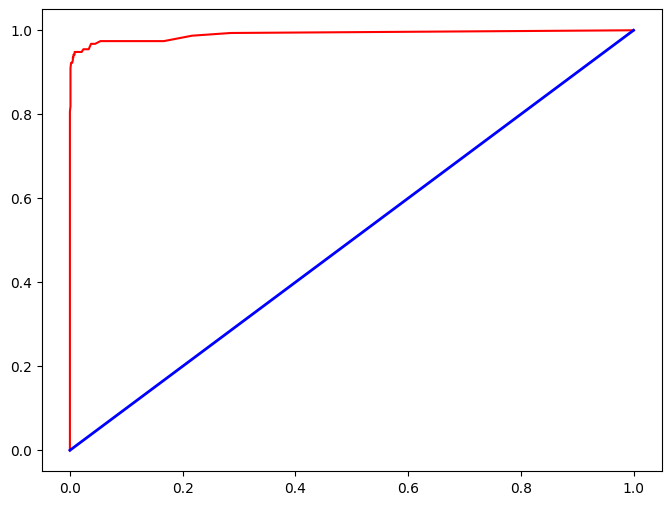

In [ ]:
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr,color="red", label=f'AUC = {auc(fpr, tpr):.2f}')
plt.plot([0,1],[0,1], color="blue", lw=2);

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
model.score(x_train, y_train)

0.9661207089970832

In [ ]:
y_preds = model.predict(x_test)
y_preds

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9623318385650225

In [ ]:
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
model.score(x_train, y_train)

0.9764415526138658

In [ ]:
y_preds = model.predict(x_test)
y_preds

array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_preds)
accuracy

0.9650224215246637

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
prediction = model.predict(x_train)
accuracy = accuracy_score(y_train, prediction)

In [ ]:
accuracy

0.9661207089970832

In [ ]:
model_names = ["Random Forest", "Logistic Regression", "GradientBoosting"]

In [ ]:
acc_list = []

In [ ]:
for model in [RandomForestClassifier(), LogisticRegression(), GradientBoostingClassifier()]:
    model.fit(x_train, y_train)
    y_preds = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_preds)
    acc_list.append(accuracy)

In [ ]:
model_result = pd.DataFrame({'Model': model_names, 'Accuracy': acc_list})
model_result

,Model,Accuracy
0,Random Forest,0.981166
1,Logistic Regression,0.962332
2,GradientBoosting,0.961435


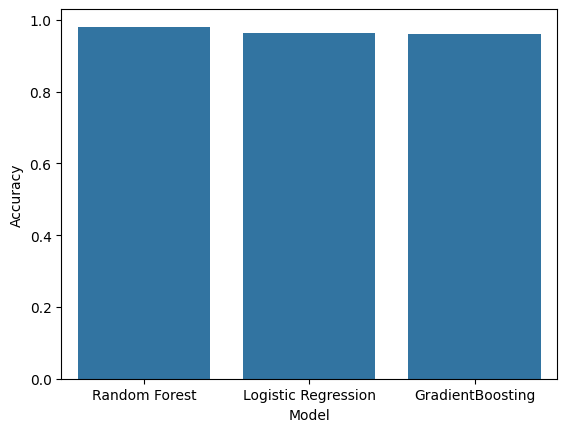

In [ ]:
sns.barplot(x= "Model", y= "Accuracy", data = model_result);

In [ ]:
sns.barplot(x= "Model", y= "Accuracy", data = model_result);input_mail = ["Thank you for always being a blessing. Your support means the world to me, and I promise not to take it for granted. I'm truly grateful"]
if isinstance(input_mail, list):
    input_mail = input_mail[0]
input_mail = input_mail.lower()
input_mail = [input_mail]
prediction = model.predict(feature_extraction.transform(input_mail))
print(prediction)
if prediction[0] == 1:
    print("Spam")
else:
    print("Ham")


[0]
Ham
